# Kinds of Machine Learning

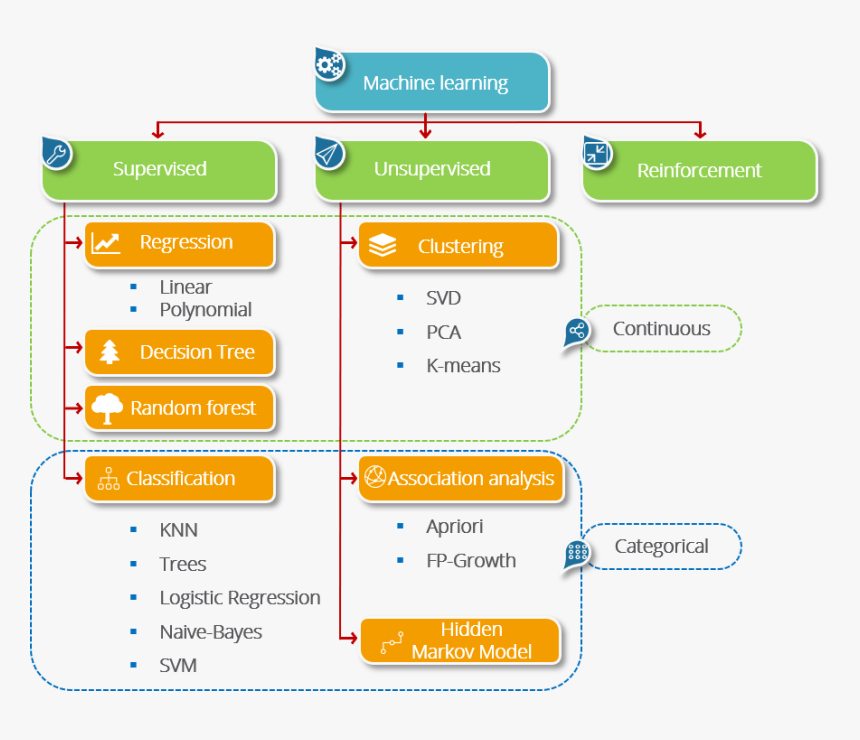

Reference: https://www.pngitem.com/middle/hRJJRJJ_types-of-machine-learning-machine-learning-types-of/

# Principal component analysis (PCA) 주성분 분석
- Feature 수가 많으면 over-fitting 발생
- **Selection**
  - Features중 적절한 features만을 사용
- **Reduction**
  - Features를 모두 사용하되 특성을 합쳐서 결과적인 feature 수를 줄이는 방식
  - 대표적으로 **PCA**
  - 주로 **text, image**에서 사용

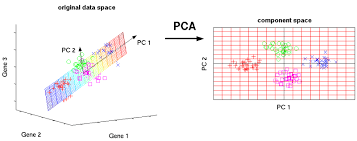

Reference: https://m.blog.naver.com/sanghan1990/221156213790

N-feature sample -> N-dimension vector
- N-feature중 비슷한 것들은 합치기 (reduction)
- '비슷한': 벡터 분석, 최대한 분산유지 (분산이 가장 큰 방향으로 합치기)
  - vector와 vector의 곱: 선형변환 (Linear transition)
  - 모든 vectors는 세개의 vector 곱으로 분해 가능
  - Ex. SVD, eigenvector
- Feature 간 비교/결합을 위해 mean = 0으로 맞춤 (scaling)
- 각 샘플(벡터)를 모두 분해
- 최대 분산을 유지하는 방향 (주성분)을 가지는 feature끼리 결합.

# 단점
- **차원 축소로 인한 정보 손실 필수불가결**
- 손실된 데이터는 복구 불가능
- 다량의 연산 필요

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

n_components: 남겨진 features의 수

In [ ]:
iris = load_iris()
print(iris.data.shape)

pca = PCA(n_components = 2)
reduced = pca.fit_transform(iris.data)
print(reduced.shape)
print(reduced[:10])

(150, 4)
(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


# Reduction 전

In [ ]:
X = iris.data
y = iris.target

lr = LogisticRegression(max_iter = 1000, random_state = 1)
print(cross_val_score(lr, X, y).mean())

0.9733333333333334


# Reduction (PCA) 후

In [ ]:
X = reduced
y = iris.target

lr = LogisticRegression(random_state = 1)
print(cross_val_score(lr, X, y).mean())

0.96


# 활용 예제
- 숫자 그림이 있는 8x8 크기의 사진 data를 PCA를 이용하여 feature reduction한 뒤, classification 수행
- 64개의 features

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(digits.data.shape)

(1797, 64)


# PCA 전

In [ ]:
X = digits.data
y = digits.target

print('PCA 전')
lr = LogisticRegression(max_iter = 1000, n_jobs = 8)
print('Mean Accuracy: ',cross_val_score(lr, X, y).mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
lr = lr.fit(X_train, y_train)
print('Accuracy: ',lr.score(X_test, y_test))

PCA 전
Mean Accuracy:  0.9126477870628289
Accuracy:  0.9688888888888889


# PCA 후
- n_components: 32

In [ ]:
X = PCA(n_components = 32).fit_transform(digits.data)
y = digits.target

print('PCA 후')
lr = LogisticRegression(max_iter = 1000, n_jobs = 8)
print('Mean Accuracy: ',cross_val_score(lr, X, y).mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
lr = lr.fit(X_train, y_train)
print('Accuracy: ',lr.score(X_test, y_test))

PCA 후
Mean Accuracy:  0.909874651810585
Accuracy:  0.9555555555555556


- n_components: 16

In [ ]:
X = PCA(n_components = 16).fit_transform(digits.data)
y = digits.target

print('PCA 후')
lr = LogisticRegression(max_iter = 1000, n_jobs = 8)
print('Mean Accuracy: ',cross_val_score(lr, X, y).mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
lr = lr.fit(X_train, y_train)
print('Accuracy: ',lr.score(X_test, y_test))

PCA 후
Mean Accuracy:  0.891485608170845
Accuracy:  0.9266666666666666


n_components: 10

In [ ]:
X = PCA(n_components = 10).fit_transform(digits.data)
y = digits.target

print('PCA 후')
lr = LogisticRegression(max_iter = 1000, n_jobs = 8)
print('Mean Accuracy: ',cross_val_score(lr, X, y).mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
lr = lr.fit(X_train, y_train)
print('Accuracy: ',lr.score(X_test, y_test))

PCA 후
Mean Accuracy:  0.8887202104611575
Accuracy:  0.9111111111111111


# 활용 예제 2
- 와인 features으로 quality를 예측하는 model 만들기
- Conditions:
  - PCA, n_components: 5
  - algorithm: Random Forest

- https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

wine_quality_red = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/winequality-red.csv', sep = ';')
print(wine_quality_red.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
pca = PCA(n_components=5)
X = pca.fit_transform(wine_quality_red.loc[:,:'alcohol'])
y = wine_quality_red['quality']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
scaled_X_train, scaled_X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators = 500, max_depth = 7, n_jobs = 8, max_features = 3).fit(scaled_X_train, y_train)
#lr = LogisticRegression(max_iter = 1000, n_jobs = 8).fit(scaled_X_train, y_train)

print('PCA(n_components = 5)')
print('Random Forest Accuracy: ',rf.score(scaled_X_test, y_test))
#print('Logistic Regression Accuracy: ',lr.score(scaled_X_test, y_test))

PCA(n_components = 5)
Random Forest Accuracy:  0.6225


In [ ]:
X = wine_quality_red.loc[:,:'alcohol']
y = wine_quality_red['quality']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
scaled_X_train, scaled_X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators = 500, max_depth = 7, n_jobs = 8, max_features = 3).fit(X_train, y_train)
print('Accuracy: ',rf.score(X_test, y_test))

Accuracy:  0.645


# 상관관계 확인

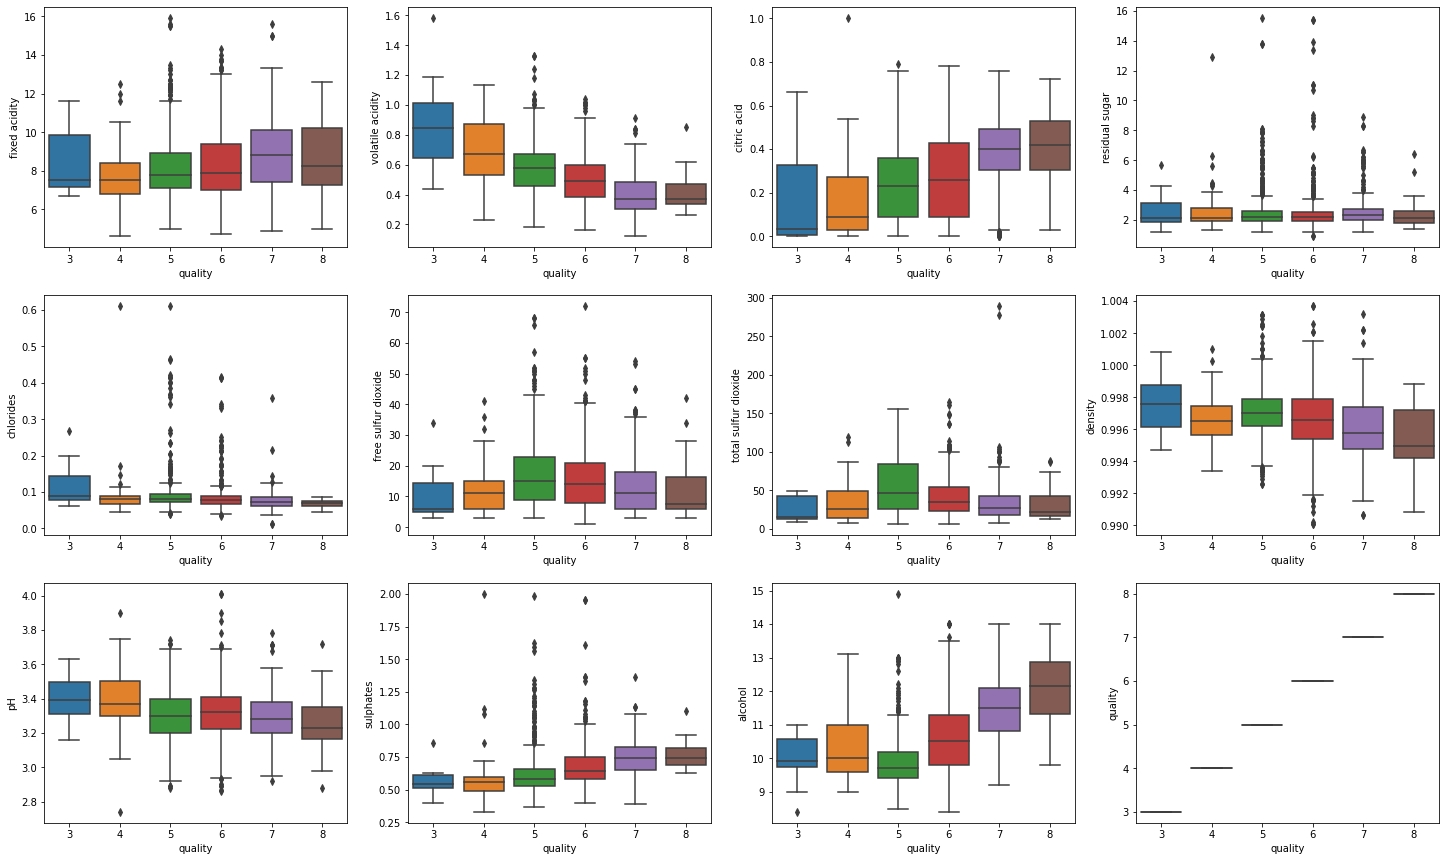

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,4, figsize = (25, 15))
for i, col in enumerate(wine_quality_red.columns):
  sns.boxplot(data = wine_quality_red, x = 'quality', y = col, ax = axes[i//4][i%4])